In [1]:
import matplotlib.pyplot as plt
import warp
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

I've written a small python library called [fwarp](https://github.com/n-s-f/warp) to warp functions. The helper functions accept a function and some parameters, and return a new function that is a warped version of the original.

I'll demonstrate below, using the numpy sin function as an example, plotted between $0$ and $2\pi$. The functions will work the same way, though, for any user-defined function.

### Compressing and elongating

The simplest manipulations are elongating and compressing functions. The second parameter into these functions is the factor by which the function is to be compressed or elongated.

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 1, 1e3)

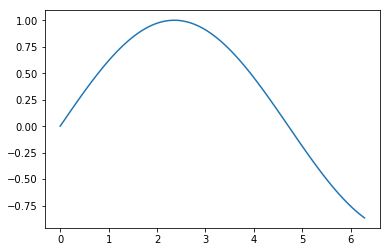

In [3]:
long_sin = warp.elongate(np.sin, 1.5)
plt.plot(x, long_sin(x));

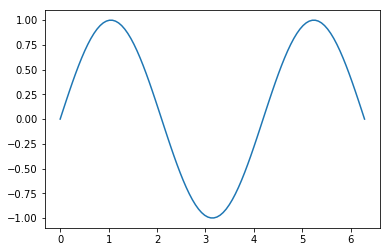

In [4]:
short_sin = warp.compress(np.sin, 1.5)
plt.plot(x, short_sin(x));

### Adding noise

It is also sometimes usefule to get a noisy version of a function. The `fwarp.add_noise` function returns a function that is a noisy version of the original. The second praameter into this function is the standard deviation of the gaussian noise added to the function.

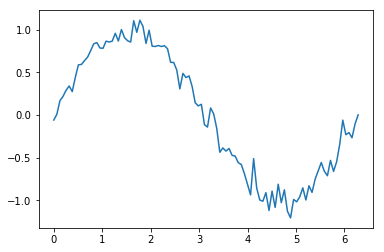

In [5]:
noisy_sin = warp.add_noise(np.sin, 0.1)
plt.plot(x, noisy_sin(x));

### Scaling

fwarp also allows for scaling that varies over the course of a function. The second parameter is a list of "break points" between 0 and 1 representing some fractions at which you would like the function to be broken up, the third is a list of "scale weights" that determine the factor by which each resulting section of the function is scaled, and the final parameter is the "period" at which this pattern repeats.

In the example below, the period is $\pi$, so it occurs twice over the course of the plot. Within that period, the first 30% is scaled by a factor of 2, the following 30% is scaled by a factor of 5, and the final 40% is scaled by a factor of 1 (i.e. has the original scaling).

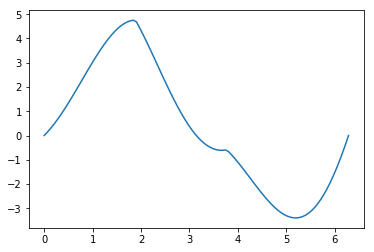

In [22]:
scaled_sin = warp.scale(np.sin, [.3, .6], [2, 5, 1, 6], np.pi*2)
plt.plot(x, scaled_sin(x));

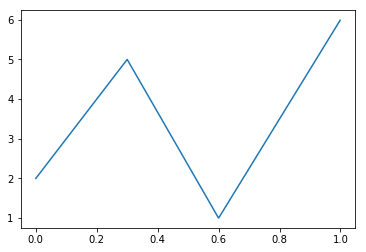

In [24]:
scale_func = warp.generate_scale_function([.3, .6], [2, 5, 1, 6])
plt.plot(y, scale_func(y));

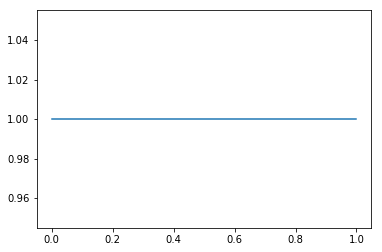

In [25]:
scale_func = warp.generate_scale_function([.25, .5, .75], [1,1,1,1,1])
plt.plot(y, scale_func(y));

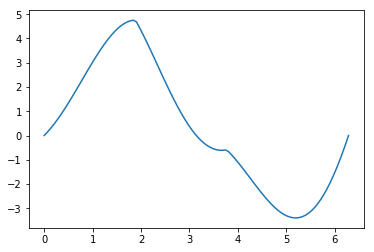

In [19]:
plt.plot(x, warp.fscale(np.sin, scale_func, np.pi*2)(x));

### Time warping

fwarp's time warping function is parameterized in a similar way to the scaling function.  The second parameter is again a list of breakpoints between 0 and 1. The third parameter is how much of the original function you would like to be covered in the corresponding section of the function, and the period is again how often that pattern repeats.

In the example below, we set the period to $\pi$, so it occurs twice over the course of the plot.  In the first 20% of that period, we cover 20% of the original function (i.e. display the original function). In the following 60%, we cover only 10% of the original function, so the warped function looks stretched out over that period. In the final 20%, we cover the remaining 70% of the function.

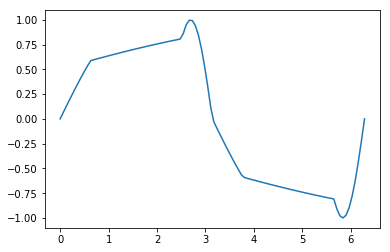

In [8]:
new_sin = warp.warp(np.sin, [.2, .8], [.2, .1, .7], np.pi)
plt.plot(x, new_sin(x));

### Recovering a distortion function

In some cases you may want to see the distorition function without actually warping a function.

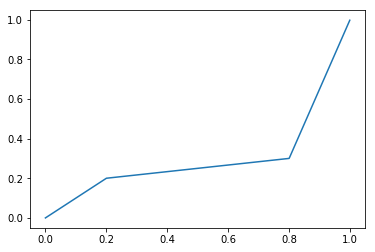

In [9]:
distortion = warp.generate_distortion_function([.2, .8], [.2, .1, .7])
plt.plot(y, distortion(y));

### Time warp with arbitrary functions

We may also be interested in time-warping from arbitrary distortion functions. In this case, we'll just use the distortion function we've recovered.

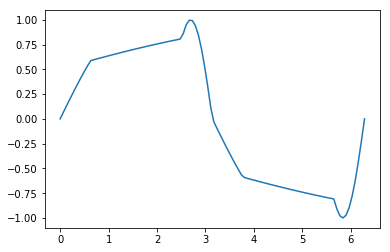

In [10]:
same_sin = warp.fwarp(np.sin, distortion, np.pi)
plt.plot(x, same_sin(x));

Now we'll use an exponential distortion.

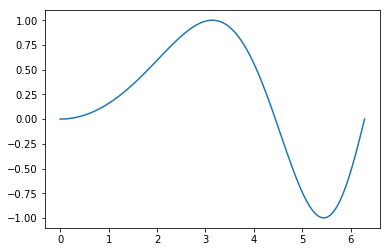

In [11]:
exp_sin = warp.fwarp(np.sin, lambda x: x**2, np.pi * 2)
plt.plot(x, exp_sin(x));

We can also invert our distortion function:

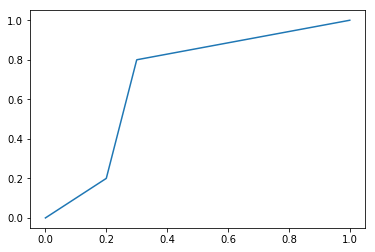

In [12]:
inv_dist = warp.invert_distortion_function(distortion)
plt.plot(y, inv_dist(y));

And if we distort a warped signal with the inverse of the distortion function used to generate it, we except the same signal back:

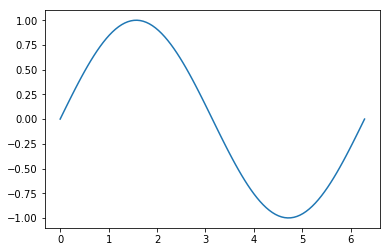

In [13]:
double_inv = warp.fwarp(same_sin, inv_dist, np.pi)
plt.plot(x, double_inv(x));

### Conclusion

This library can be installed with `pip install fwarp`. These helpers can be combined to manipulate functions in more complicated ways.